# Non-Metric MDS Analysis

In [1]:
from sklearn.manifold import MDS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
observations = 'ABCDEFGHIJ'

S = np.array([[0, 12, 38, 15, 39, 3, 43, 36, 40, 13],
              [12, 0, 22, 44, 20, 32, 18, 28, 7, 35],
              [38, 22, 0, 21, 45, 11, 41, 26, 5, 24],
              [15, 44, 21, 0, 19, 31, 17, 29, 8, 34],
              [39, 20, 45, 19, 0, 9, 42, 33, 6, 23],
              [3, 32, 11, 31, 9, 0, 4, 10, 1, 37],
              [43, 18, 41, 17, 42, 4, 0, 27, 14, 16],
             [36, 28, 26, 29, 33, 10, 27, 0, 25, 30],
              [40, 7, 5, 8, 6, 1, 14, 25, 0, 2],
              [13, 35, 24, 34, 23, 37, 16, 30, 2, 0]])
print(S) # similarity matrix

[[ 0 12 38 15 39  3 43 36 40 13]
 [12  0 22 44 20 32 18 28  7 35]
 [38 22  0 21 45 11 41 26  5 24]
 [15 44 21  0 19 31 17 29  8 34]
 [39 20 45 19  0  9 42 33  6 23]
 [ 3 32 11 31  9  0  4 10  1 37]
 [43 18 41 17 42  4  0 27 14 16]
 [36 28 26 29 33 10 27  0 25 30]
 [40  7  5  8  6  1 14 25  0  2]
 [13 35 24 34 23 37 16 30  2  0]]


In [3]:
print(S.shape)

(10, 10)


In [4]:
DS = np.max(S) + 1 - S # covert similarity matrix
# into dissimilarity matrix
np.fill_diagonal(DS, 0)
print(DS)

[[ 0 34  8 31  7 43  3 10  6 33]
 [34  0 24  2 26 14 28 18 39 11]
 [ 8 24  0 25  1 35  5 20 41 22]
 [31  2 25  0 27 15 29 17 38 12]
 [ 7 26  1 27  0 37  4 13 40 23]
 [43 14 35 15 37  0 42 36 45  9]
 [ 3 28  5 29  4 42  0 19 32 30]
 [10 18 20 17 13 36 19  0 21 16]
 [ 6 39 41 38 40 45 32 21  0 44]
 [33 11 22 12 23  9 30 16 44  0]]


In [5]:
dissimilarity_df = pd.DataFrame(DS,
                  columns = list(observations),
                  index = list(observations))
dissimilarity_df

,A,B,C,D,E,F,G,H,I,J
A,0,34,8,31,7,43,3,10,6,33
B,34,0,24,2,26,14,28,18,39,11
C,8,24,0,25,1,35,5,20,41,22
D,31,2,25,0,27,15,29,17,38,12
E,7,26,1,27,0,37,4,13,40,23
F,43,14,35,15,37,0,42,36,45,9
G,3,28,5,29,4,42,0,19,32,30
H,10,18,20,17,13,36,19,0,21,16
I,6,39,41,38,40,45,32,21,0,44
J,33,11,22,12,23,9,30,16,44,0


In [6]:
stress = []
max_dimension = 15
for t in range(1, max_dimension + 1):  
  mds = MDS(metric = False, n_components = t,
          dissimilarity = 'precomputed', random_state = 0,
          normalized_stress = 'auto', max_iter = 500)
  mds.fit(DS)
  stress.append(mds.stress_)

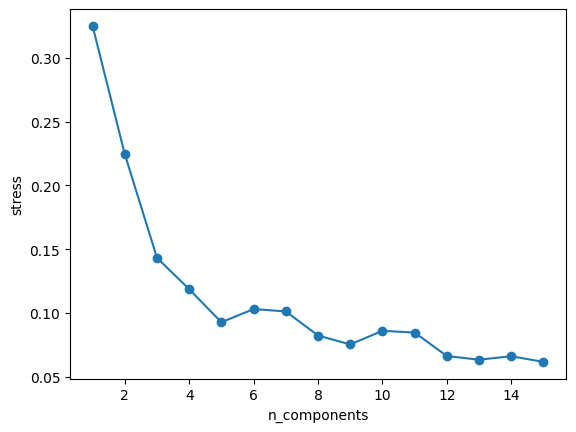

In [7]:
plt.plot(range(1, max_dimension+1), stress)
plt.scatter(range(1, max_dimension+1), stress)
plt.xlabel('n_components')
plt.ylabel('stress')
plt.show()

In [8]:
stress[:5]

[0.32525602099711176,
 0.22458958999993198,
 0.14319578685446782,
 0.11855777762383313,
 0.09261136685658207]

## MDS with 3 Components

In [9]:
# optimal number of components seems to be 3
mds = MDS(metric = False, n_components = 3,
          dissimilarity = 'precomputed', random_state = 0,
          normalized_stress = 'auto', max_iter = 500)
embeddings = mds.fit_transform(DS)

In [10]:
print(mds.stress_)

0.14319578685446782


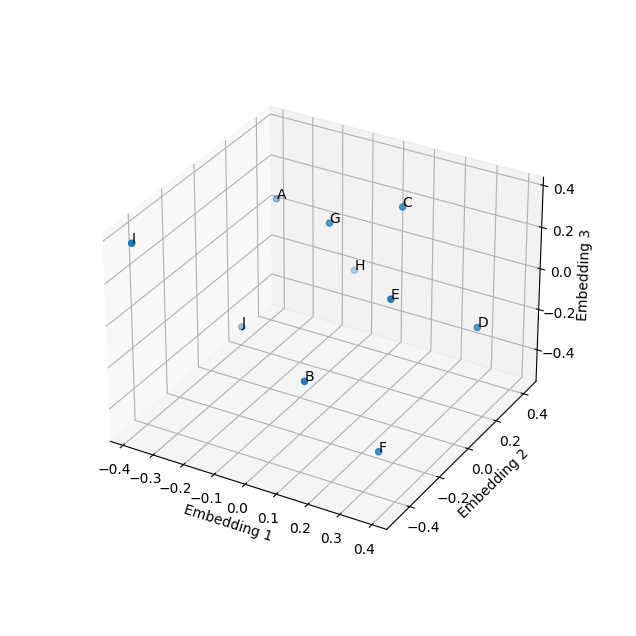

In [11]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embeddings[:, 0], embeddings[:, 1],
           embeddings[:, 2])

# Set axis labels
ax.set_xlabel('Embedding 1')
ax.set_ylabel('Embedding 2')
ax.set_zlabel('Embedding 3')


for idx, letter in enumerate(observations):
  ax.text(embeddings[idx][0], embeddings[idx][1],
          embeddings[idx][2], letter)

# Show the plot
ax.set_box_aspect(aspect=None, zoom=0.8)
plt.show()